###  Collecting data

In [1]:
#collecting data
import pandas as pd # used for data analysis
import numpy as np  #used to perform scientific computation
import seaborn as sns #for statistical ploting
import matplotlib.pyplot as plt # same
%matplotlib inline
import math

titanic_data = pd.read_csv('E:\headbrain dataset/Titanic.csv')
titanic_data.head(10)


,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
5,"Anderson, Mr Harry",1st,47.00,male,1
6,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1
7,"Andrews, Mr Thomas, jr",1st,39.00,male,0
8,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1
9,"Artagaveytia, Mr Ramon",1st,71.00,male,0


In [2]:
print("total passengers in data:" +str(len(titanic_data.index)))

total passengers in data:1313


### Analysing data

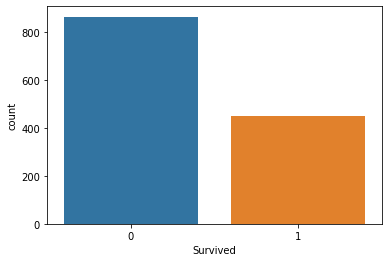

In [3]:
#step 2 is analysing the data by plotting relations in the data
#lets check the data of passengers who survived 
sns.countplot(x="Survived", data = titanic_data)

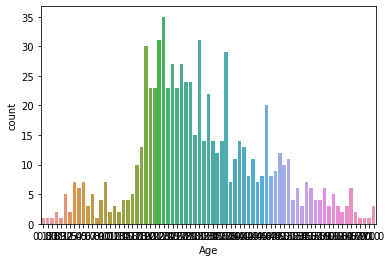

In [4]:

sns.countplot(x="Age", data = titanic_data)

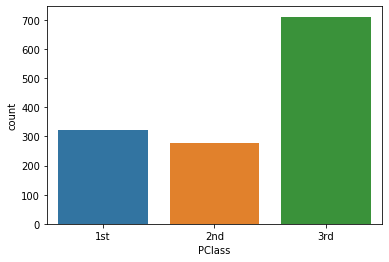

In [5]:
sns.countplot(x="PClass", data = titanic_data)

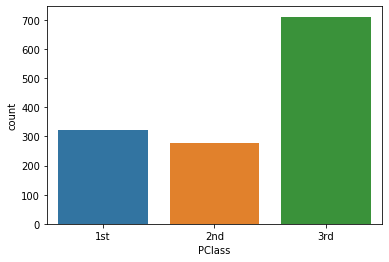

In [6]:
sns.countplot(x="PClass", data = titanic_data)

In [7]:
S = titanic_data["Survived"].values
print(type(S))
C = titanic_data["PClass"].values
j=0

for i in range(len(titanic_data.index)):
    if S[i] == 1:
        S[j] += S[i] 
        j += 1
 



<class 'numpy.ndarray'>


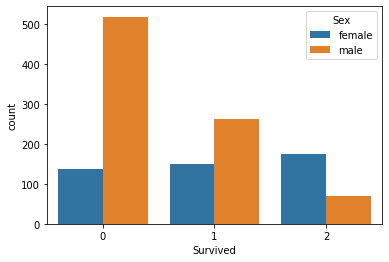

In [8]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

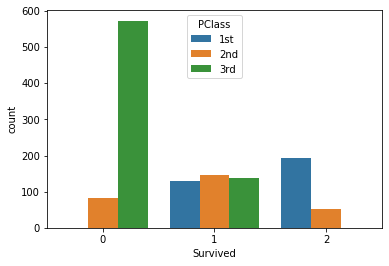

In [9]:
sns.countplot(x="Survived" ,hue ="PClass", data=titanic_data)

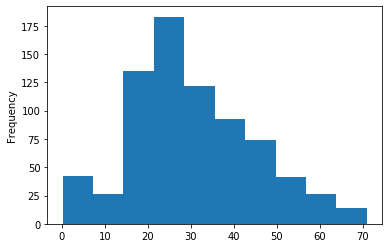

In [10]:
titanic_data["Age"].plot.hist()

### Data Wrangling

In [11]:
#step 3 data wrangling like removing unneccessary data
#check null data
titanic_data.isnull()

,Name,PClass,Age,Sex,Survived
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1308,False,False,False,False,False
1309,False,False,False,False,False
1310,False,False,False,False,False
1311,False,False,False,False,False


In [12]:
titanic_data.isnull().sum()

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

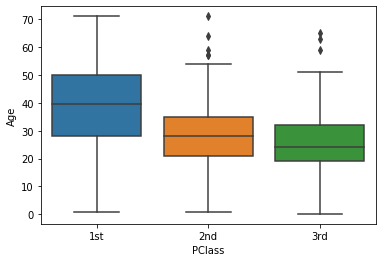

In [13]:
sns.boxplot(x="PClass", y="Age", data=titanic_data)

In [16]:
#remove a column which is of no use
titanic_data.drop("column_name",axis=1, inplace=True)

KeyError: "['column_name'] not found in axis"

In [17]:
#removing null values
titanic_data.dropna(inplace=True)


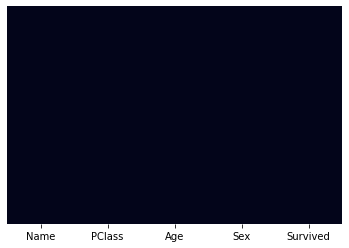

In [18]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar= False)

In [19]:
pd.get_dummies(titanic_data['Sex']) #to implement LoR it should be converted to categorical variable(dummie variable)(converting to 0 1 format)

,female,male
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
1308,0,1
1309,0,1
1310,0,1
1311,0,1


In [20]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [21]:
pclass = pd.get_dummies(titanic_data["PClass"],drop_first=True)

In [22]:
print(pclass)

      2nd  3rd
0       0    0
1       0    0
2       0    0
3       0    0
4       0    0
...   ...  ...
1308    0    1
1309    0    1
1310    0    1
1311    0    1
1312    0    1

[756 rows x 2 columns]


In [23]:
#add these data/column to the main csv file by concatinating 
titanic_data = pd.concat([titanic_data,sex,pclass], axis=1)

In [24]:
titanic_data.head(5)

,Name,PClass,Age,Sex,Survived,male,2nd,3rd
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,2,0,0,0
1,"Allison, Miss Helen Loraine",1st,2.00,female,1,0,0,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,1,1,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,1,0,0,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,2,1,0,0


In [25]:
titanic_data.drop(['PClass','Name','Sex'],axis=1, inplace=True)

In [26]:
titanic_data.head(5)

,Age,Survived,male,2nd,3rd
0,29.00,2,0,0,0
1,2.00,1,0,0,0
2,30.00,1,1,0,0
3,25.00,1,0,0,0
4,0.92,2,1,0,0


### Train data

In [27]:
#step 4 training and testing the data 
#split the data into train and test subsets
#build the model on the train data and predict the output on test data

In [28]:
X = titanic_data.drop("Survived",axis=1) # independent variable , all the data except dependent 
y = titanic_data["Survived"] # dependent variable ,outcome to be predicted

In [29]:
#sklearn to split
from sklearn.model_selection import train_test_split # cross_validation has been renamed as model_selection

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()

In [34]:
logmodel.fit(X_train,y_train) #training the model

C:\Users\Hemant\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [39]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.80      0.79        94\n           1       0.59      0.59      0.59        79\n           2       0.78      0.74      0.76        54\n\n    accuracy                           0.71       227\n   macro avg       0.72      0.71      0.71       227\nweighted avg       0.71      0.71      0.71       227\n'

In [41]:
from sklearn.metrics import confusion_matrix


### Accuracy check

In [42]:
confusion_matrix(y_test,predictions)

array([[75, 18,  1],
       [22, 47, 10],
       [ 0, 14, 40]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score


In [44]:
accuracy_score(y_test,predictions)

0.7136563876651982